# 1. Packages

First, I imported all packages that are needed to be used.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from util import *
from logistic_regression import *

%matplotlib inline

# 2. Data

Here, I loaded the dataset.

In [20]:
X1, y1 = load_data("data/processed/dataset_1.csv")
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2, y2 = load_data("data/processed/dataset_2.csv")
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

Then, I checked the first few instances of the dataset.

In [21]:
X1_train.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [22]:
y1_train.head(5)

68     0
181    1
63     0
248    0
60     0
Name: class, dtype: int64

After that, I checked the dimensions of the data.

In [23]:
print("The shape of X1_train is: ", X1_train.shape)
print("The shape of y1_train is: ", y1_train.shape)

The shape of X1_train is:  (455, 30)
The shape of y1_train is:  (455,)


# 3. Model

First, I trained my model with the first dataset

In [46]:
my_lr = MyLogisticRegression(0.0001, 10000, 1)
my_lr.fit(X1_train, y1_train)

Iteration    0: Cost     0.69   
Iteration 1000: Cost    22.44   
Iteration 2000: Cost    23.48   
Iteration 3000: Cost    26.14   
Iteration 4000: Cost    31.97   
Iteration 5000: Cost    30.56   
Iteration 6000: Cost    29.55   
Iteration 7000: Cost    34.09   
Iteration 8000: Cost    31.74   
Iteration 9000: Cost    34.71   
Iteration 9999: Cost    38.52   


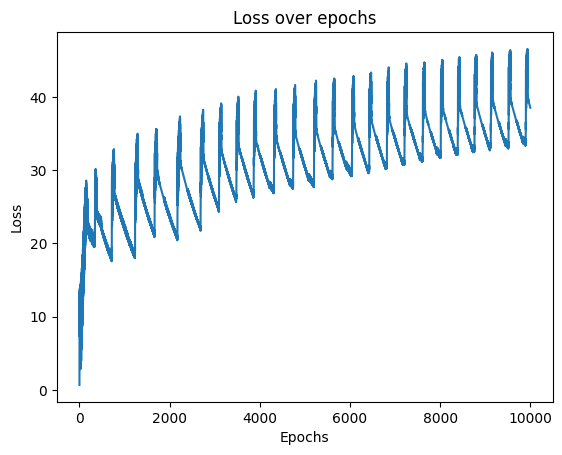

In [47]:
my_lr.plot_loss()

In [48]:
y1_pred = my_lr.predict(X1_test)
print("The accuracy of my model for the first dataset is: ", accuracy_score(y1_test, y1_pred))

The accuracy of my model for the first dataset is:  0.9649122807017544


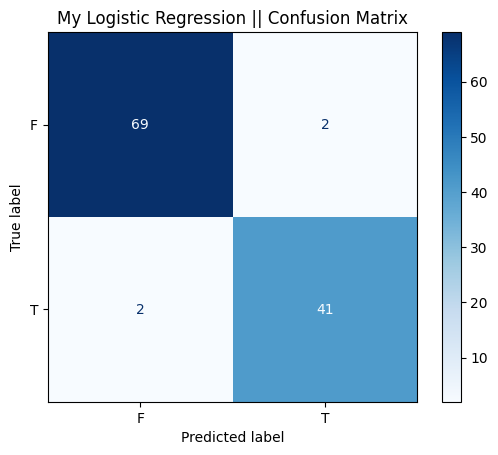

In [49]:
my_cm1 = confusion_matrix(y1_test, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=my_cm1,display_labels=['F','T'])
disp.plot(cmap='Blues')
plt.title('My Logistic Regression || Confusion Matrix')
plt.show()

In [29]:
lr = LogisticRegression(max_iter=10000, tol=0.0005)
lr.fit(X1_train, y1_train)
y1_pred_lr = lr.predict(X1_test)
print("The accuracy of sklearn's model for the first dataset is: ", accuracy_score(y1_test, y1_pred_lr))

The accuracy of sklearn's model for the first dataset is:  0.956140350877193


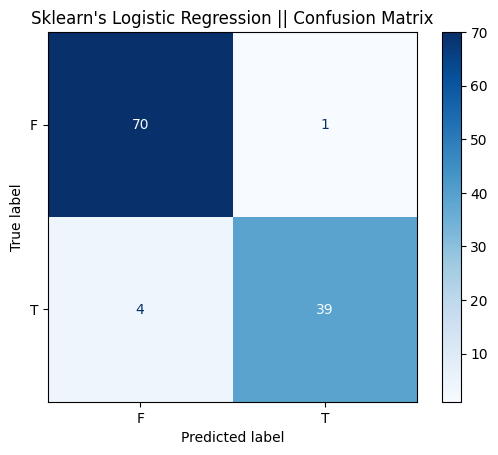

In [30]:
cm1 = confusion_matrix(y1_test, y1_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=['F','T'])
disp.plot(cmap='Blues')
plt.title("Sklearn's Logistic Regression || Confusion Matrix")
plt.show()

In [42]:
my_lr2 = MyLogisticRegression(0.0001, 10000, 1)
my_lr2.fit(X2_train, y2_train)

Iteration    0: Cost     0.69   
Iteration 1000: Cost     5.51   
Iteration 2000: Cost     6.66   
Iteration 3000: Cost     5.52   
Iteration 4000: Cost     4.43   
Iteration 5000: Cost     5.27   
Iteration 6000: Cost     5.53   
Iteration 7000: Cost     5.53   
Iteration 8000: Cost     6.42   
Iteration 9000: Cost     6.69   
Iteration 9999: Cost     7.62   


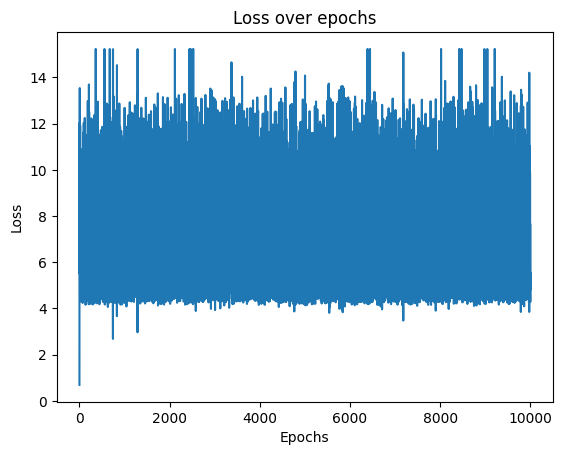

In [43]:
my_lr2.plot_loss()

In [44]:
y2_pred = my_lr2.predict(X2_test)
print("The accuracy of my model for the second dataset is: ", accuracy_score(y2_test, y2_pred))

The accuracy of my model for the second dataset is:  0.7352732434350603


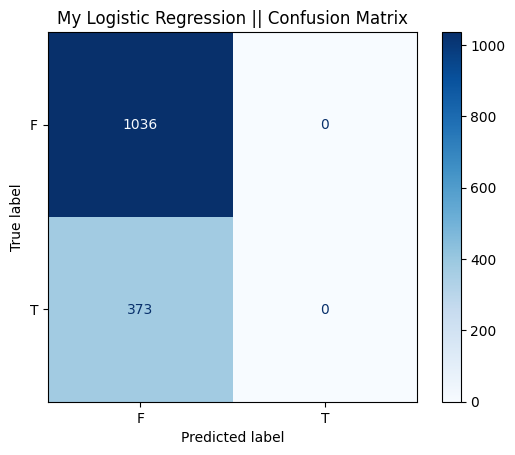

In [45]:
my_cm2 = confusion_matrix(y2_test, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=my_cm2,display_labels=['F','T'])
disp.plot(cmap='Blues')
plt.title('My Logistic Regression || Confusion Matrix')
plt.show()

In [34]:
lr2 = LogisticRegression(max_iter=10000, tol=0.0005)
lr2.fit(X2_train, y2_train)

LogisticRegression(max_iter=10000, tol=0.0005)

In [35]:
y2_pred_lr = lr2.predict(X2_test)
print("The accuracy of sklearn's model for the second dataset is: ", accuracy_score(y2_test, y2_pred_lr))

The accuracy of sklearn's model for the second dataset is:  0.7977288857345636


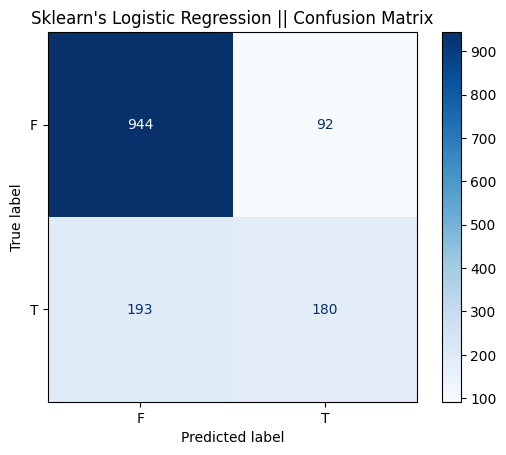

In [36]:
cm2 = confusion_matrix(y2_test, y2_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=['F','T'])
disp.plot(cmap='Blues')
plt.title("Sklearn's Logistic Regression || Confusion Matrix")
plt.show()